# `Wine Grader - European Origin of Wines`

### `Stakeholder`
- European Origin of Wines
- Pinot Nior
- Chardonnay
- Bolinger
  

## `Business Understanding`

`Goal`: Build a machine learning model to grade wine in accordance with the `Wine Grading Mandate`

`Null Hypothesis`: There is no correlation between the alchol content of the wine and the grade

`Alternative Hypothesis`: There is a statistically significant correlation between the alcohol content and the grade of wine

**Analytical Question:** 

1. How strong is the correlation between the alcohol content and the acidity?
2. Does the level of inorganic content in the alchol affect the grade?
3. Does hue impact the alcohol content?
4. How does the taste features of the wine affect its grade and alchol content?
5. How does the color features of the wine affect its grade and alchol content?


**Features**
1. **Alcohol:** The alcohol content of the wine.
2. **Malic acid:** The amount of malic acid in the wine, which can affect the taste and acidity.
3. **Ash:** The ash content in the wine, representing the inorganic content after incineration.
4. **Alcalinity of ash:** The alkalinity of the ash, which can influence the taste and pH of the wine.
5. **Magnesium:** The amount of magnesium in the wine.
6. **Total phenols:** The total amount of phenolic compounds in the wine, which contribute to its flavor and color.
7. **Flavanoids:** The amount of flavonoids in the wine, which are responsible for various sensory attributes.
8. **Nonflavanoid phenols:** The amount of non-flavonoid phenolic compounds in the wine.
9. **Proanthocyanins:** The amount of proanthocyanins, a type of antioxidant, in the wine.
10. **Color intensity:** The color intensity of the wine, which can be influenced by various compounds.
11. **Hue:** The hue of the wine, representing the color shade.
12. **OD280/OD315 of diluted wines:** The optical density of the wine, which is measured at two different wavelengths. It can provide information about the color.
13. **Proline:** The amount of proline, an amino acid, in the wine.
14. **Grade**: What grade of wine

## `Data Understanding`

#### Importations

In [3]:
#Data Visualization & Manipulations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, FunctionTransformer, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.model_selection import GridSearchCV

#Utilities
import joblib
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [4]:
wine_data = load_wine()
wine_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
df = pd.DataFrame(data=wine_data['data'], columns=wine_data['feature_names'])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [6]:
df['Grade'] = pd.DataFrame(data=wine_data['target'], columns=['Grade'])

In [7]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Grade
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
# Convery grade to categorical
df['Grade'] = df['Grade'].apply(lambda x: 'Grade A' if x == 0  else ("Grade B" if x == 1 else 'Grade C'))

In [9]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Grade
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,Grade A
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,Grade A
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,Grade A
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,Grade A
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,Grade A


## Exploratory Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Grade

In [11]:
df.duplicated().sum()

0

In [12]:
# Describe data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


### Univariate Analysis

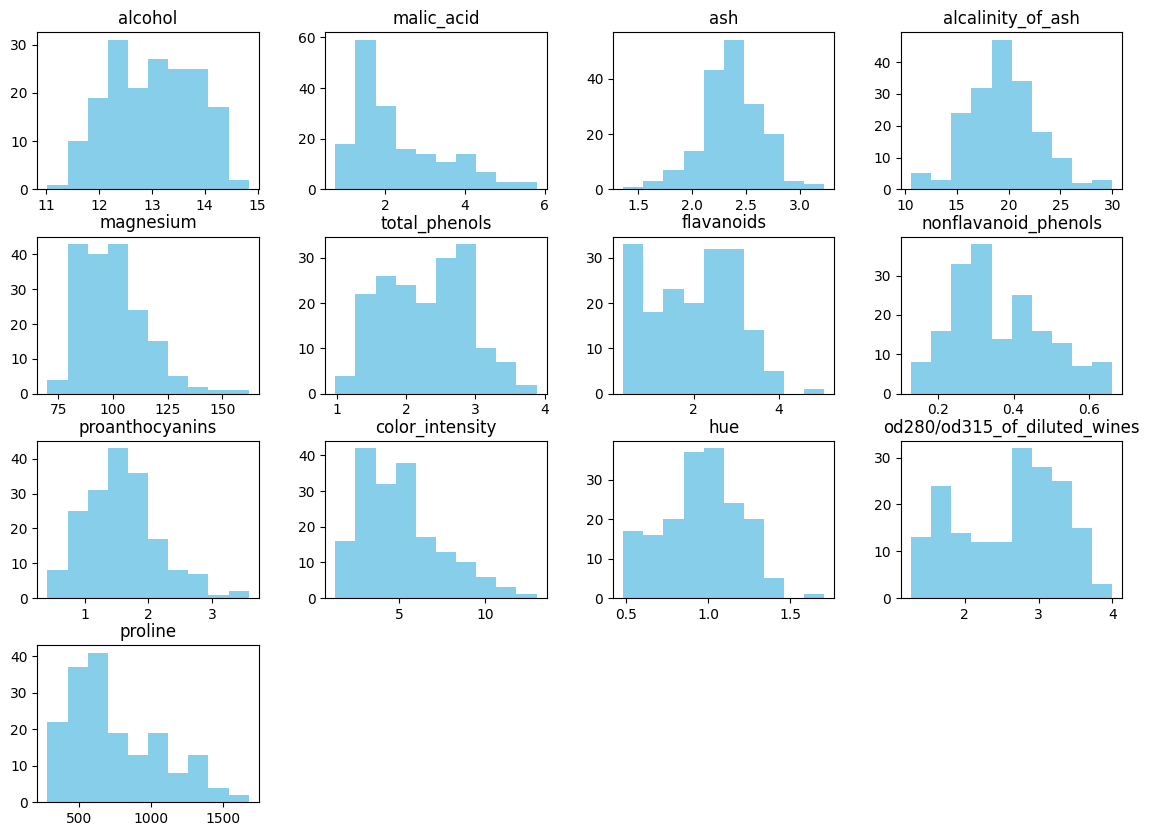

In [13]:
df.hist(figsize=(14, 10), color='skyblue', grid=False)
plt.show()

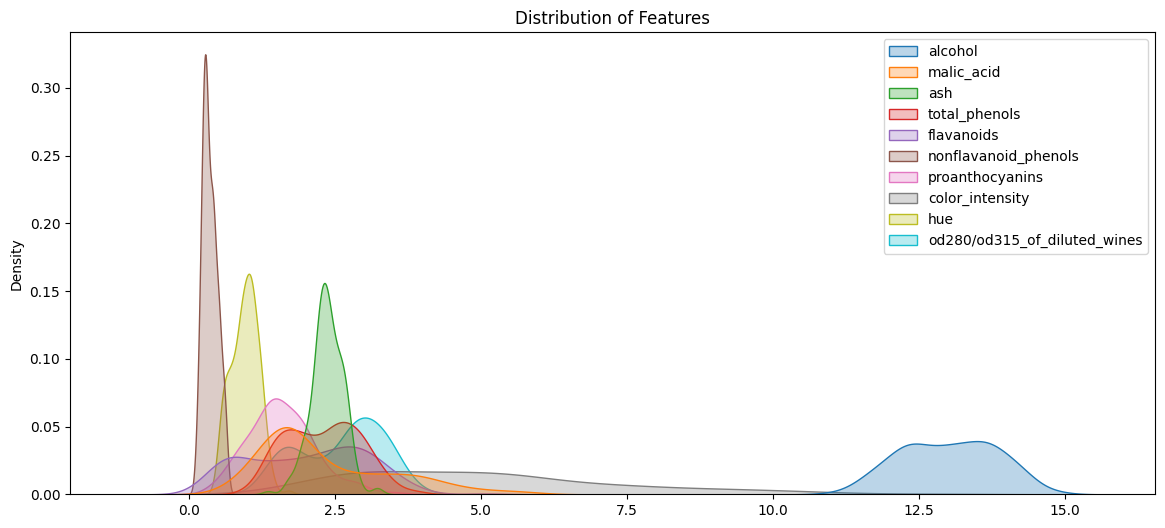

In [14]:
plt.figure(figsize=(14, 6))
sns.kdeplot(df.drop(['proline', 'alcalinity_of_ash', 'magnesium'], axis=1), fill=True, alpha=0.3)
plt.title('Distribution of Features')
plt.show()

<Axes: ylabel='Density'>

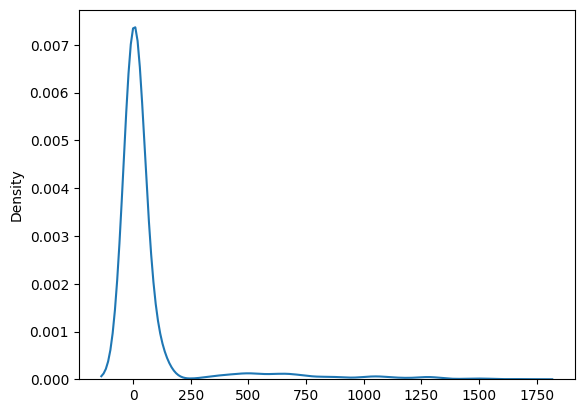

In [15]:
sns.kdeplot(df.drop('Grade', axis=1).values.ravel())

### Check for outliers

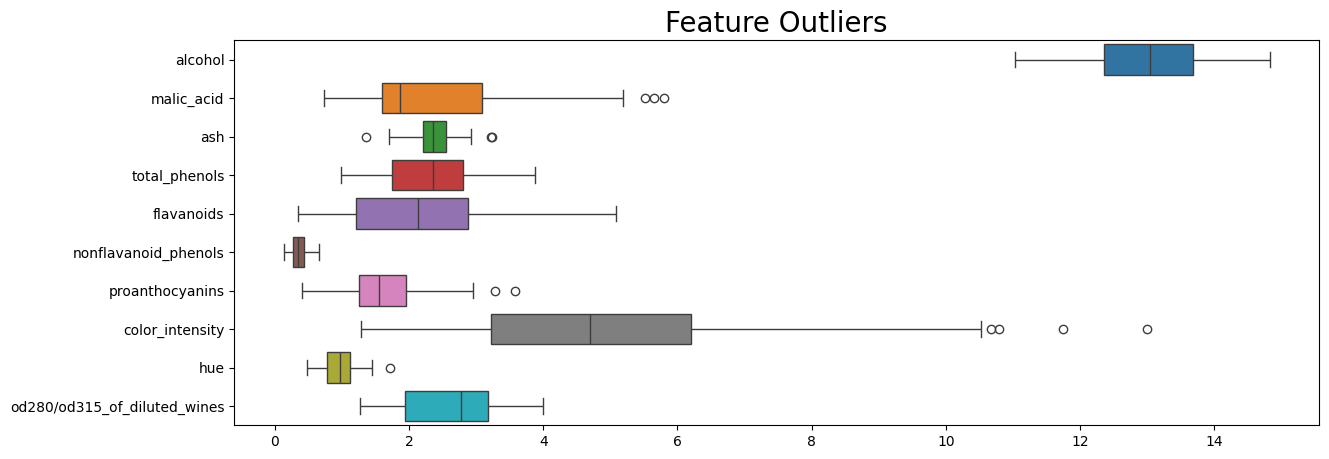

In [16]:
# Outlier check for features
plt.figure(figsize=(14, 5))
sns.boxplot(df.drop(['proline', 'magnesium', 'alcalinity_of_ash'], axis=1), orient='h')
plt.title('Feature Outliers', fontsize=20)
plt.show()

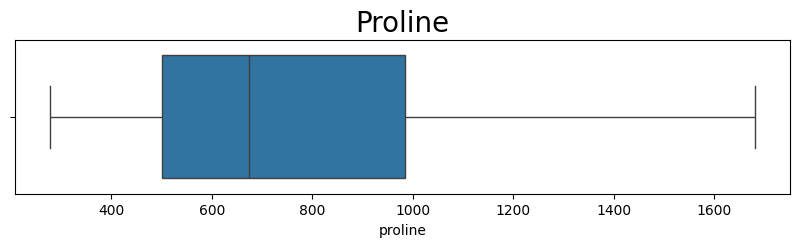

In [17]:
plt.figure(figsize=(10, 2))
sns.boxplot(df['proline'], orient='h')
plt.title('Proline', fontsize=20)
plt.show()

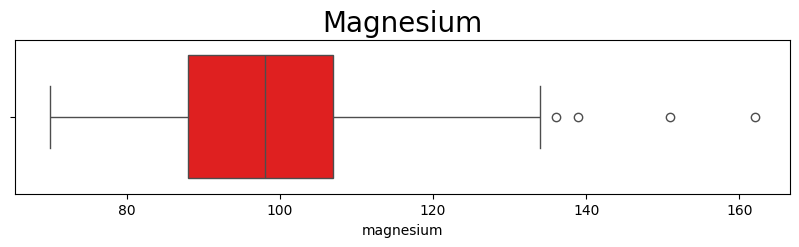

In [18]:
plt.figure(figsize=(10, 2))
sns.boxplot(df['magnesium'], orient='h', color='red')
plt.title('Magnesium', fontsize=20)
plt.show()

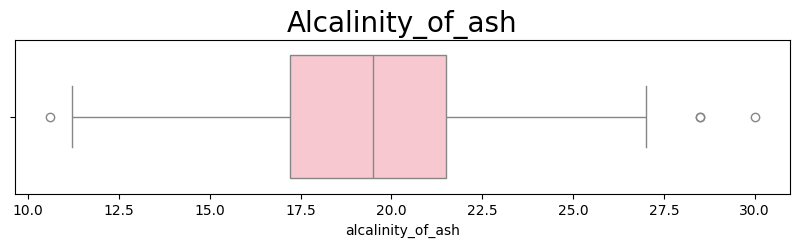

In [19]:
plt.figure(figsize=(10, 2))
sns.boxplot(df['alcalinity_of_ash'], orient='h', color='pink')
plt.title('Alcalinity_of_ash', fontsize=20)
plt.show()

### Bi-Variate Analysis

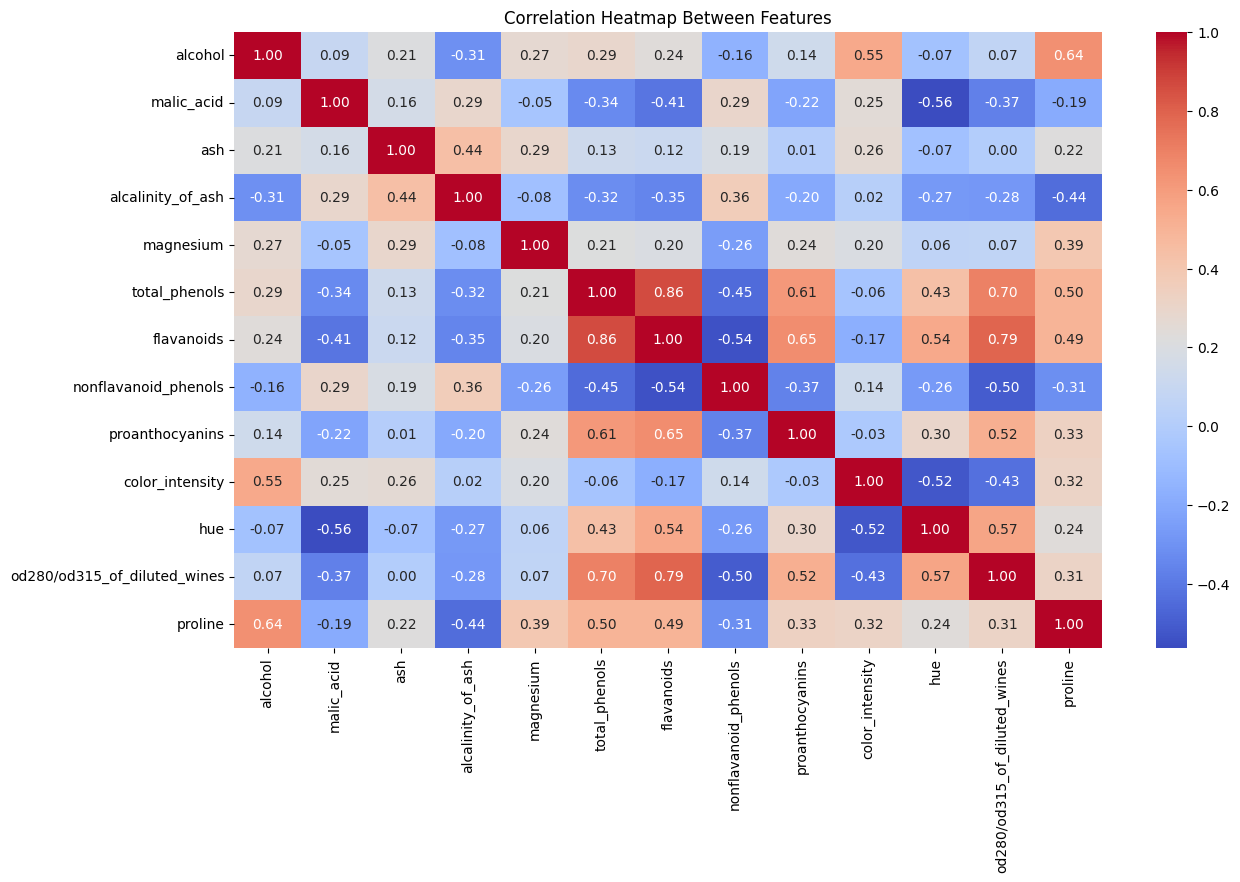

In [20]:
plt.figure(figsize=(14, 8))
correlation_matrix = df.drop('Grade', axis=1).corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap Between Features')
plt.show()

In [21]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'Grade'],
      dtype='object')

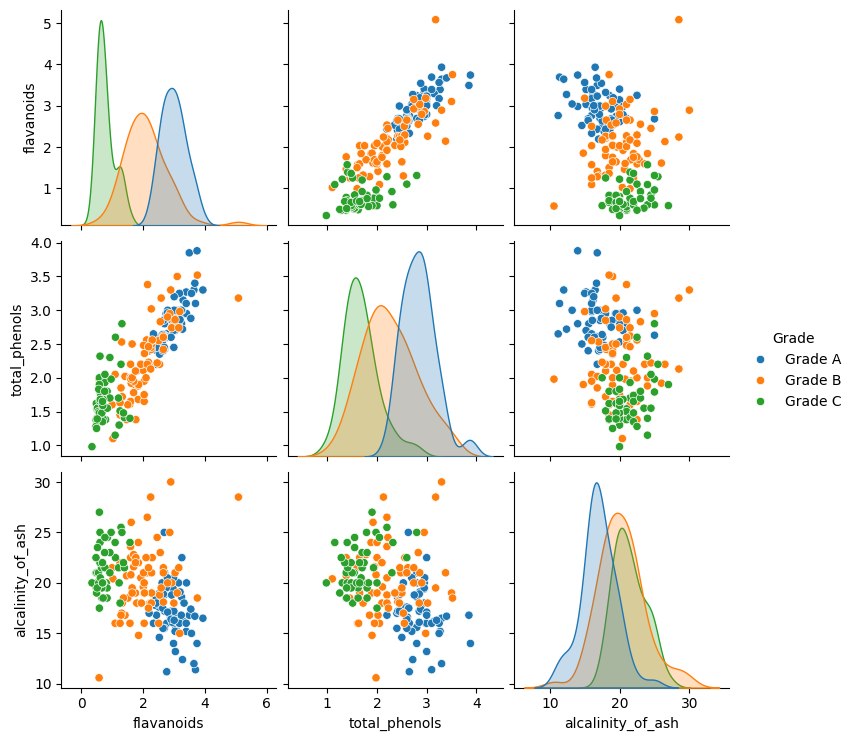

In [22]:
taste_df = df[['flavanoids', 'total_phenols', 'alcalinity_of_ash', 'Grade']]
sns.pairplot(taste_df, hue='Grade')

### Multivariate Analysis

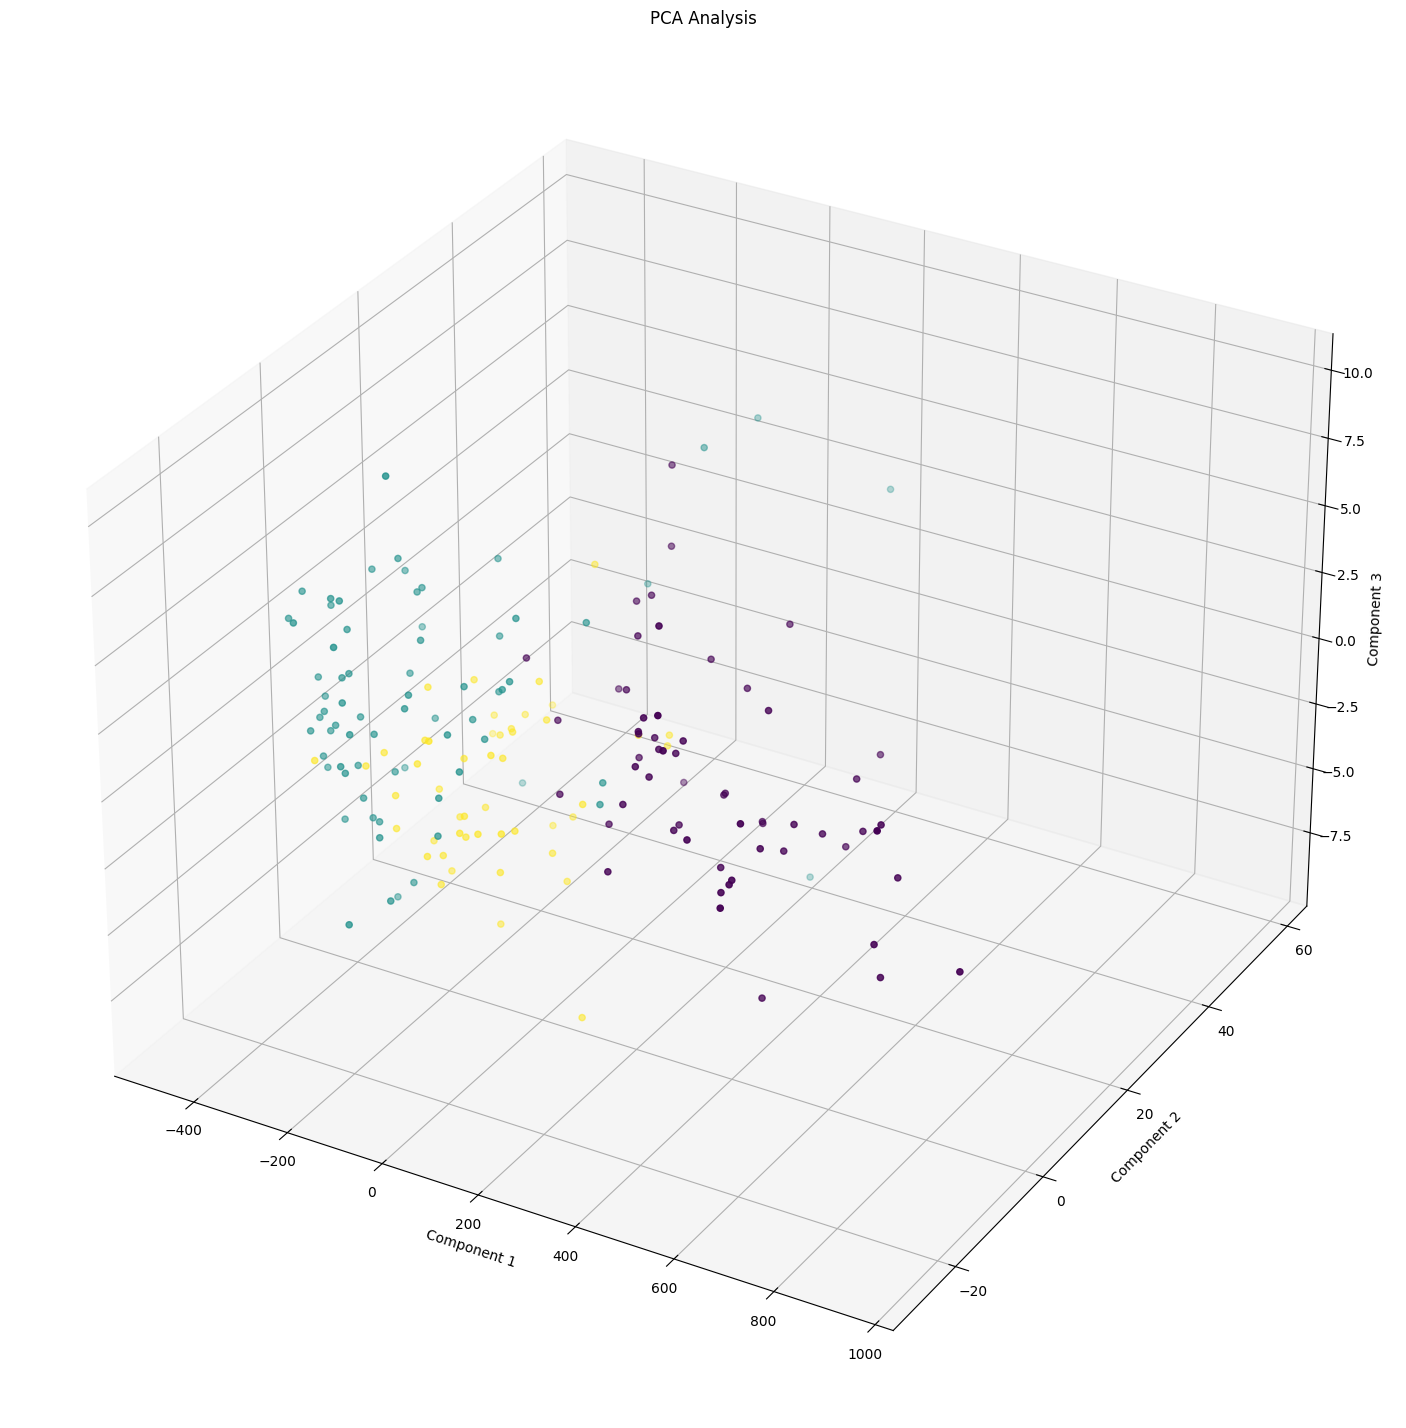

In [23]:
from sklearn.decomposition import PCA

X = wine_data['data']
y = wine_data['target']

pca = PCA(n_components=3)
pca_wine = pca.fit_transform(X)

fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_wine[:, 0], pca_wine[:, 1], pca_wine[:, 2], c=y, cmap='viridis')

ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")

plt.title('PCA Analysis')
plt.show()

In [24]:
# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05])

In [25]:
# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Get the component loadings
component_loadings = pca.components_

# Print the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained variance ratio of Component {i+1}: {ratio}")

# Print the component loadings
for i, component in enumerate(component_loadings):
    print(f"Component {i+1} loadings:")
    for j, feature in enumerate(wine_data.feature_names):
        print(f"{j + 1} - {feature}: {component[j]}")
    print()


Explained variance ratio of Component 1: 0.9980912304918974
Explained variance ratio of Component 2: 0.0017359156247057496
Explained variance ratio of Component 3: 9.495895755146091e-05
Component 1 loadings:
1 - alcohol: 0.001659264719642073
2 - malic_acid: -0.0006810155555011521
3 - ash: 0.0001949057418915889
4 - alcalinity_of_ash: -0.00467130058127623
5 - magnesium: 0.017868007506895368
6 - total_phenols: 0.0009898296800817925
7 - flavanoids: 0.001567288301793057
8 - nonflavanoid_phenols: -0.00012308666181031305
9 - proanthocyanins: 0.0006006077918217756
10 - color_intensity: 0.0023271431925767474
11 - hue: 0.00017138003714523408
12 - od280/od315_of_diluted_wines: 0.0007049316445910609
13 - proline: 0.9998229365233258

Component 2 loadings:
1 - alcohol: 0.0012034061657710624
2 - malic_acid: 0.0021549818397451803
3 - ash: 0.0045936925434053805
4 - alcalinity_of_ash: 0.026450393026476025
5 - magnesium: 0.9993441860623368
6 - total_phenols: 0.0008779621521437714
7 - flavanoids: -5.18507

## `Data Preparation`

#### Check if Data is balanced

In [26]:
df['Grade'].value_counts().rename('Total Count').reset_index()

,Grade,Total Count
0,Grade B,71
1,Grade A,59
2,Grade C,48


In [27]:
df.rename(columns={'od280/od315_of_diluted_wines': 'od280_od315_of_diluted_wines'}, inplace=True)

In [28]:
X = df.drop('Grade', axis=1)
y = df['Grade']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#### Encode y-label

In [30]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

#### Create a preprocessor

In [31]:
input_features = X.columns

In [32]:
preprocessor = ColumnTransformer(transformers=[
    ('imputer', SimpleImputer(strategy='median'), input_features),
    ('scaler', RobustScaler(), input_features),
    ('log_tranformation', FunctionTransformer(np.log1p), input_features)
])

## `Modelling & Elavuation`

In [33]:
# List models to be trained
models = [
    ('svc', SVC(probability=True, random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('gradient_booster', GradientBoostingClassifier(random_state=42)),
    ('stochastic_gradient_descent', SGDClassifier(random_state=42) )
]

#### Train models in a loop - Unbalanced

In [34]:
# Create a table to store important metrics
results_table = pd.DataFrame(columns=["Model Name" ,"Precision", "Recall", "Accuracy", "F1_Score"])

#initialize an empty dictionary to store pipelines
all_pipelines = {}

# Loop through the models to train and get the scores 
for model_name, classifier in models:
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature Importance', SelectKBest(mutual_info_classif, k='all')),
        ('classier', classifier),
    ])

    # Fit the training data to the pipeline
    pipeline.fit(X_train, y_train_encoded)

    # Make prediction using the test or eval dataset
    y_pred = pipeline.predict(X_test)

    # Store classification report values as a dictionary
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    #Sve each individual pipeline in the loop to the initialized in dictionary
    all_pipelines[model_name] = pipeline

    # Grab values from the  metrics dictionary
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']

    # Add these values to the table
    results_table.loc[len(results_table)] = [model_name, precision, recall, accuracy, f1]


# sort table to have highest f1 on top
results_table.sort_values('F1_Score', ascending=False)


,Model Name,Precision,Recall,Accuracy,F1_Score
1,random_forest,1.000000,1.000000,1.000000,1.000000
2,gradient_booster,0.979167,0.977778,0.977778,0.977819
0,svc,0.706667,0.711111,0.711111,0.647619
3,stochastic_gradient_descent,0.474332,0.533333,0.533333,0.452357


#### Train models in a loop - Balanced

In [35]:
balance_data_metrics_table = pd.DataFrame(columns=['Model name', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

#Initialise dictionary to store pipelines trained on balanced dataset
balanced_pipelines = {}

for model_name, classifier in models:

    #Create a final pipeline using the pipeline module from imblearn
    pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(sampling_strategy='auto')),
        ('feature_importance', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier),
    ])

    # Fit the traing data to the pipeline
    pipeline.fit(X_train, y_train_encoded)

    # Make prediction using the test or eval dataset
    y_pred = pipeline.predict(X_test)

    # Store classification report values as a dictionary
    balanced_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    #Sve each individual pipleine in the loop to the initialised indictionary
    balanced_pipelines[model_name] = pipeline


    # Grab values from the balanced metric dictionary
    accuracy = balanced_metrics['accuracy'] 
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']

    # Add these values to the table
    balance_data_metrics_table.loc[len(balance_data_metrics_table)] = [model_name, accuracy, precision, recall, f1]


# sort table to have highest f1 on top
balance_data_metrics_table.sort_values(by='F1-Score', ascending=False)

,Model name,Accuracy,Precision,Recall,F1-Score
1,random_forest,1.000000,1.000000,1.000000,1.000000
2,gradient_booster,0.955556,0.956944,0.955556,0.955431
0,svc,0.777778,0.846667,0.777778,0.786190
3,stochastic_gradient_descent,0.466667,0.302000,0.466667,0.362934


In [36]:
balanced_pipelines['random_forest']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280_od315_of_diluted_wines', 'proline'],
      dtype='object')),
                                                 ('scaler', RobustScale...
                                                  Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280_od315_of_diluted_wines', 'proline'],
      dtype='object'))])),
                ('smote', SMOTE()),
                ('feature_importance',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000022101AE9B40>)),
                ('classifier', RandomForestClassifier(random_state=42))])

#### Fine-tuning model

In [37]:
# Remove least performing pipelines
del balanced_pipelines['stochastic_gradient_descent']

In [38]:
tuned_models_df = pd.DataFrame(columns=['Model name', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Define parameter grids for each model
param_grids = {
    'svc': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
    },
    'random_forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
    },
    'gradient_booster': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
    }, 
}

#Initialise dictionary to store pipelines trained on balanced dataset
tuned_pipelines = {}

# Perform Grid Search for each model
for model_name, pipeline in balanced_pipelines.items():
    #collect parameters for each model
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted')
    grid_search.fit(X_train, y_train_encoded)
    
    # Update pipeline with best parameters
    best_pipeline = grid_search.best_estimator_
    tuned_pipelines[model_name] = best_pipeline

    # Make predictions with the tuned model
    y_pred = best_pipeline.predict(X_test)

    # Store classification report values as a dictionary
    tuned_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Grab values from the balanced metric dictionary
    accuracy = tuned_metrics['accuracy']
    precision = tuned_metrics['weighted avg']['precision']
    recall = tuned_metrics['weighted avg']['recall']
    f1 = tuned_metrics['weighted avg']['f1-score']

    # Add these values to the table
    tuned_models_df.loc[len(tuned_models_df)] = [model_name, precision, recall, accuracy, f1]

# sort table to have highest f1 on top
tuned_models_df.sort_values(by='F1-Score', ascending=False)


,Model name,Accuracy,Precision,Recall,F1-Score
1,random_forest,1.000000,1.000000,1.000000,1.000000
2,gradient_booster,0.956944,0.955556,0.955556,0.955431
0,svc,0.960000,0.955556,0.955556,0.954705


#### Check tuned models individually with the best parameters

In [39]:
tuned_pipelines['random_forest']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280_od315_of_diluted_wines', 'proline'],
      dtype='object')),
                                                 ('scaler', RobustScale...
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280_od315_of_diluted_wines', 'proline'],
      dtype='object'))])),
                ('smote', SMOTE()),
                ('feature_importance',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000022101AE9B40>)),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [40]:
tuned_pipelines['svc']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280_od315_of_diluted_wines', 'proline'],
      dtype='object')),
                                                 ('scaler', RobustScale...
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280_od315_of_diluted_wines', 'proline'],
      dtype='object'))])),
                ('smote', SMOTE()),
                ('feature_importance',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000022101AE9B40>)),
                ('classifier',
                 SVC(C=1, kernel='linear', probability=True, random_state=42))])

#### Model Persistance

In [41]:
# Persist the trained pipelines along with label encoder
for model_name, pipeline in tuned_pipelines.items():
    # Save the pipeline object
    joblib.dump(pipeline, f'../models/{model_name}_pipeline.joblib')

# Save label encoder separately
joblib.dump(encoder, '../models/label_encoder.joblib')

['../models/label_encoder.joblib']

#### Key Insights

1. There are null values in the data set
2. The data set is not evenly didtributed
3. The features are on different scales
4. There seem to be outliers in most of the features
5. There seem to be a general positive correlation among the features
6. The dataset is not balanced
7. The data is positively skewed